# Exploratory Data Analysis (total_data.csv)

This notebook is an exploratory data analysis for the dataset 'total_data.csv' to further understand each column/category's importance in predicting the current macroeconomic phase.

Data was concatenated from FRED and Yahoo! Finance for the following features:
- S&P 500 Index (Yahoo! Finance)
- Federal Interest Rate (FRED)
- Consumer Price Index (FRED)
- Industrial Production Index (FRED)
- Unemployment Rate (FRED)
- Consumer Debt (FRED)
- Consumer Confidence Index (FRED)
- Building Permits (FRED)
- Corporate Profits (FRED)
- Yield Curve (FRED)

The target variable is the macroeconomic phase, which is classified into 4 categories:
- Recession: A period of economic decline.
- Expansion/Recovery: A period of economic growth.
- Peak: The highest point of the business cycle.
- Trough: The lowest point of the business cycle.

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import sys

In [12]:
# Recession data
recessions = [
    ('1960-04-01', '1961-02-01'),
    ('1969-12-01', '1970-11-01'),
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]

In [13]:
# Import dataset
dataset_path = os.path.join(os.pardir, 'data', 'processed', 'total_data.csv')
processed_ds_output_path = os.path.join(os.pardir, 'data', 'usable', 'processed_data.csv')

# Load dataset
dataset = pd.read_csv(dataset_path, index_col=0)
dataset

,date,unrate,un_1y_pct,cpi,cpi_1y_inf,cpi_1q_inf,cpi_1m_inf,fed_1y_ema,fed_1y_pct,yc_1y_ema,...,cd_1y_ema,cd_pct_1m,cd_pct_3m,cd_pct_1y,years_to_recession,years_since_recession,qts_to_recession,in_recession,recession_next_year,recession_next_quarter
0,1965-01-01,3.7,0.0,31.280,0.019182,0.003197,0.000000,3.900000,0.068416,0.680000,...,10.608892,0.001972,-0.033535,-0.024791,4.917808,3.917808,19.944444,0,0,0
1,1965-02-01,3.7,0.0,31.280,0.019182,0.003197,0.000000,3.943333,0.068416,0.680000,...,10.608892,0.001972,-0.033535,-0.024791,4.832877,4.002740,19.600000,0,0,0
2,1965-03-01,3.7,0.0,31.310,0.019182,0.003197,0.000959,3.984965,0.068416,0.680000,...,10.608892,0.001972,-0.033535,-0.024791,4.756164,4.079452,19.288889,0,0,0
3,1965-04-01,3.7,0.0,31.380,0.019182,0.003197,0.002236,4.018121,0.068416,0.680000,...,10.608892,0.001972,-0.033535,-0.024791,4.671233,4.164384,18.944444,0,0,0
4,1965-05-01,3.7,0.0,31.480,0.019182,0.006394,0.003187,4.040367,0.068416,0.680000,...,10.608892,0.001972,-0.033535,-0.024791,4.589041,4.246575,18.611111,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2024-02-01,3.9,0.0,311.054,0.031657,0.009837,0.004421,4.928879,0.759411,-0.250576,...,9.679608,0.002534,0.008478,0.045490,0.000000,0.000000,0.000000,0,0,0
710,2024-03-01,3.8,0.0,312.230,0.034751,0.011297,0.003781,4.990590,0.617260,-0.359636,...,9.679608,0.002534,0.008478,0.045490,0.000000,0.000000,0.000000,0,0,0
711,2024-04-01,3.9,0.0,313.207,0.033577,0.011373,0.003129,5.042807,0.503446,-0.365203,...,9.679608,0.002534,0.008478,0.045490,0.000000,0.000000,0.000000,0,0,0
712,2024-05-01,3.9,0.0,313.207,0.033577,0.011373,0.003129,5.086991,0.406567,-0.319245,...,9.679608,0.002534,0.008478,0.045490,0.000000,0.000000,0.000000,0,0,0


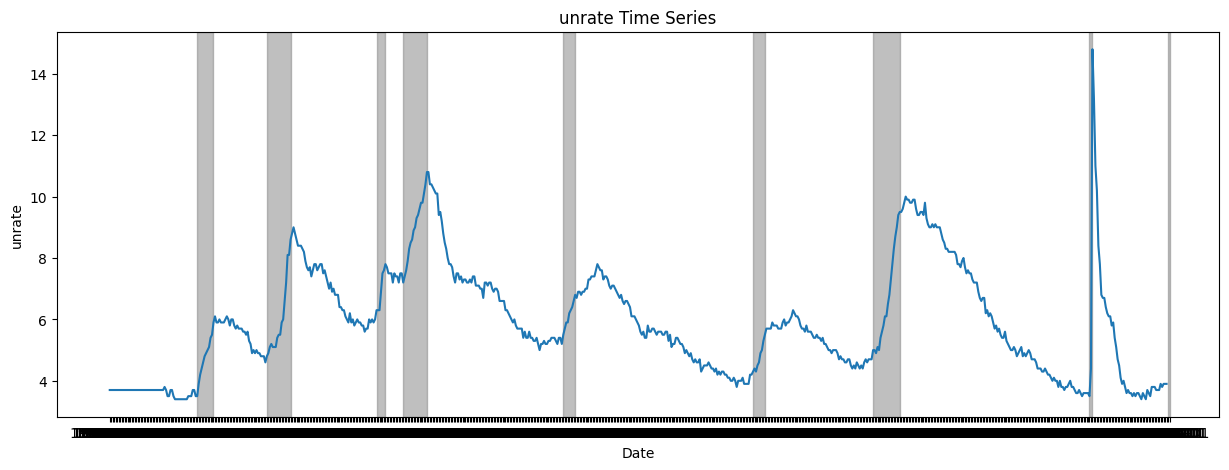

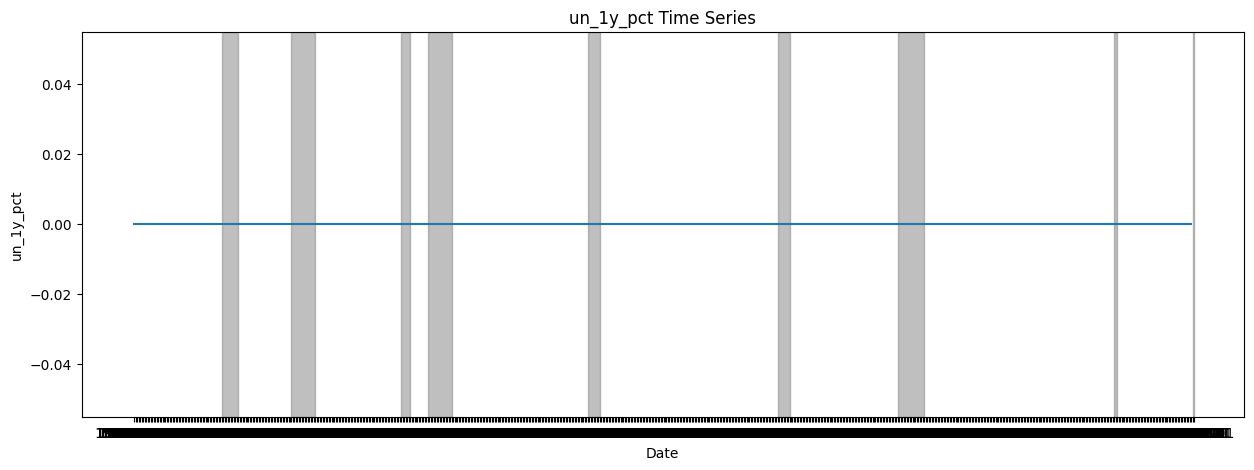

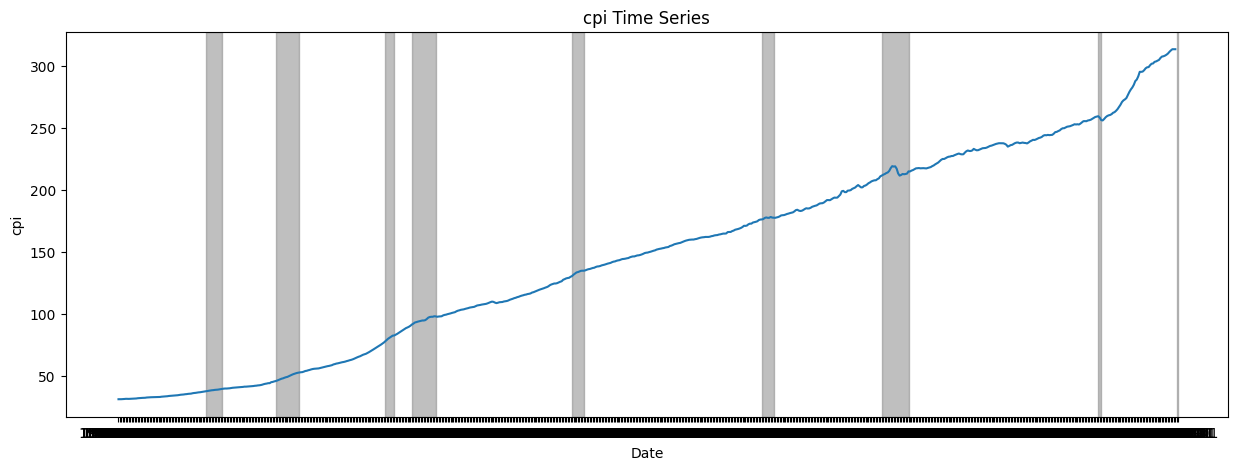

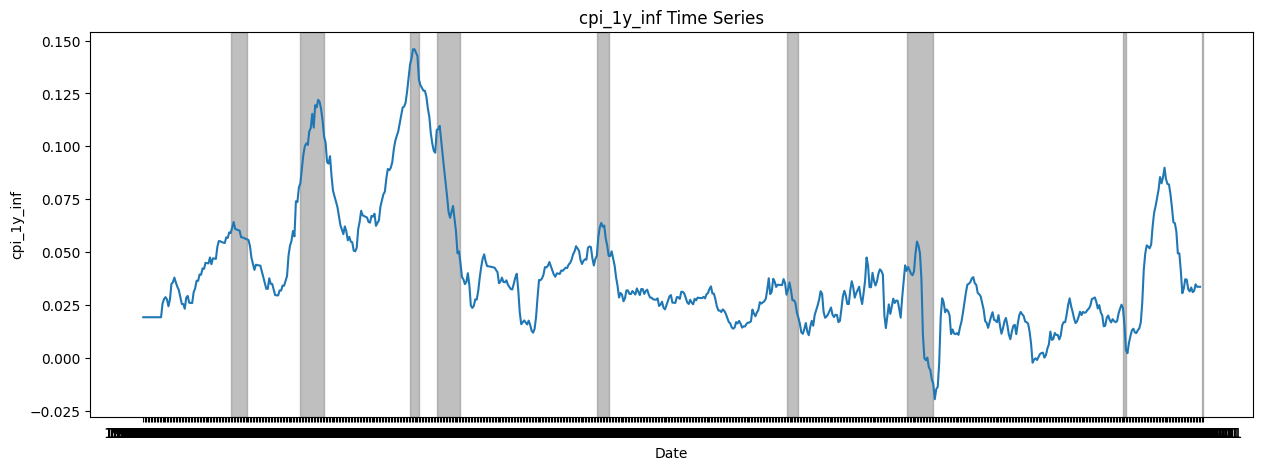

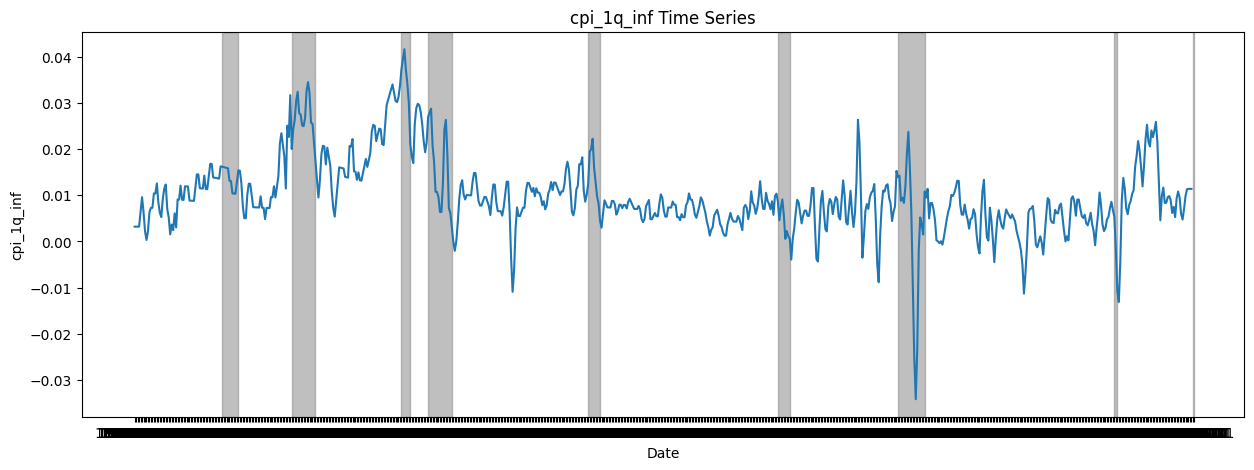

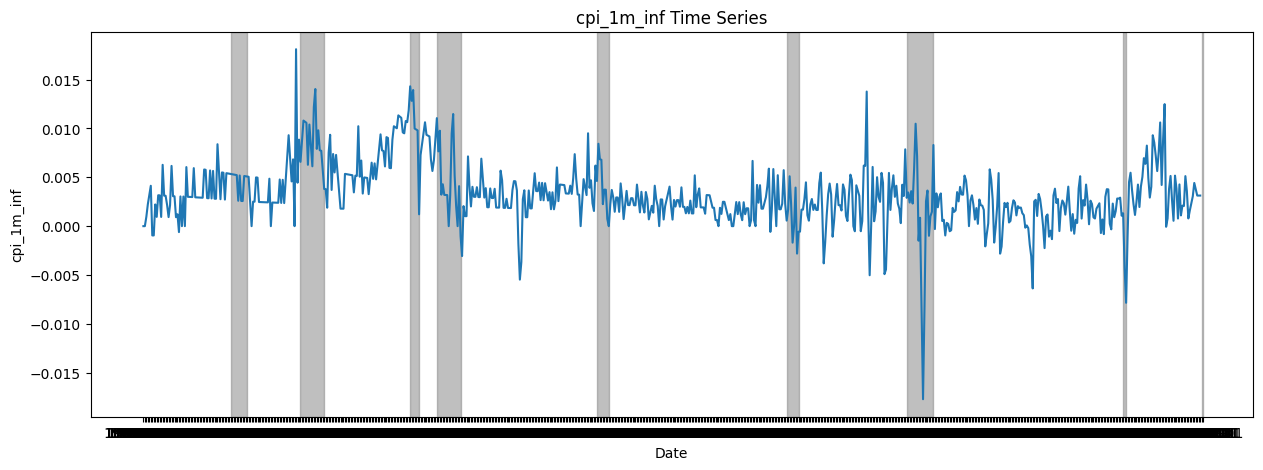

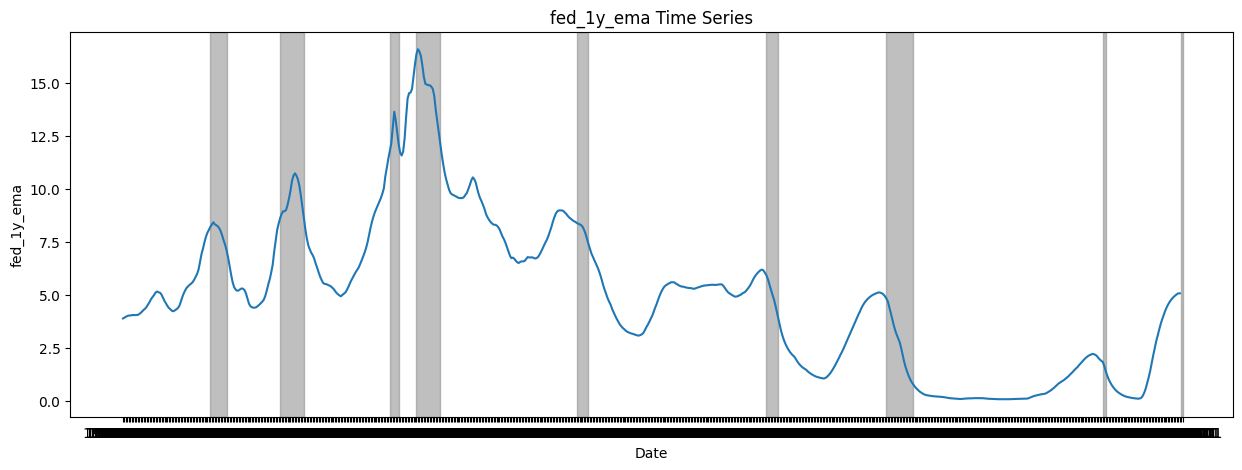

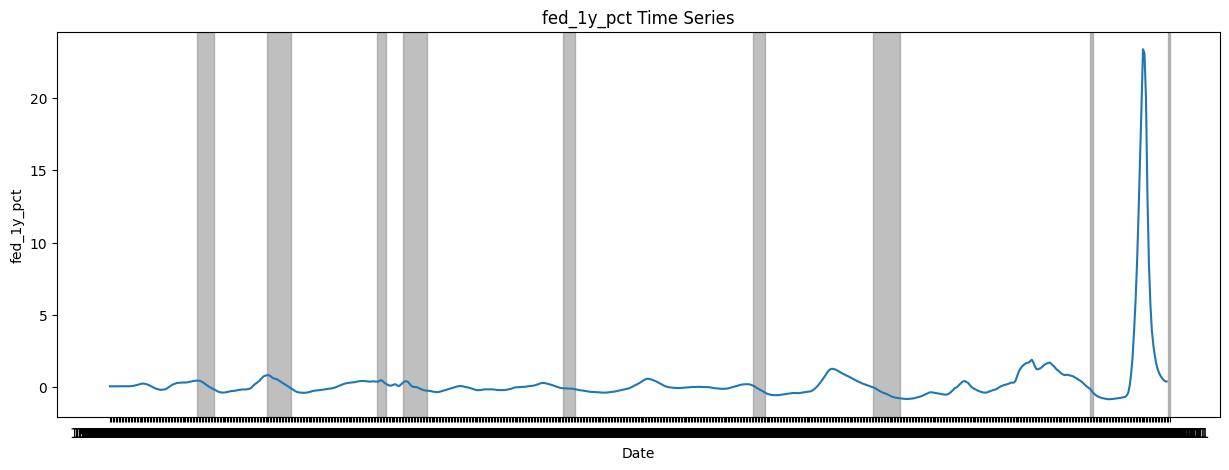

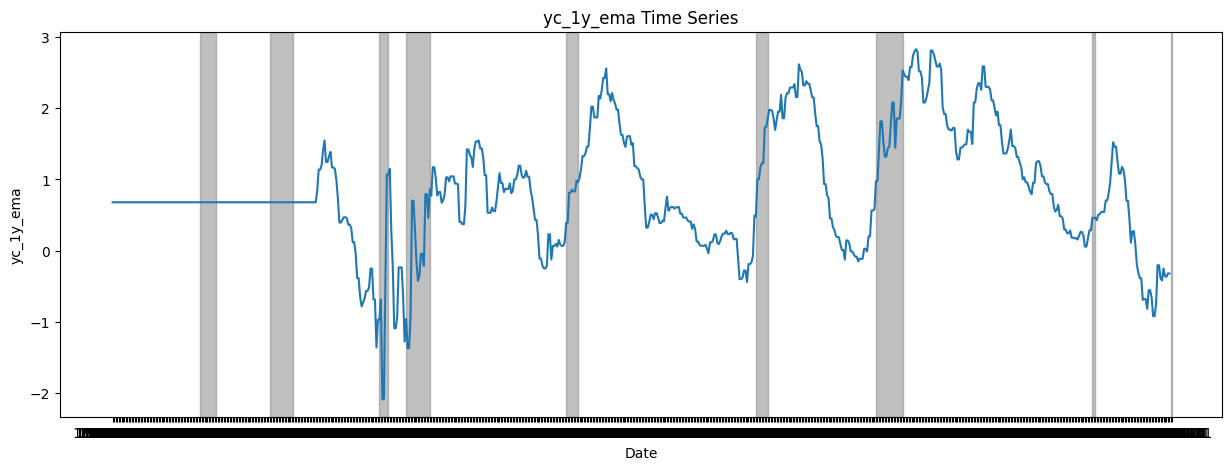

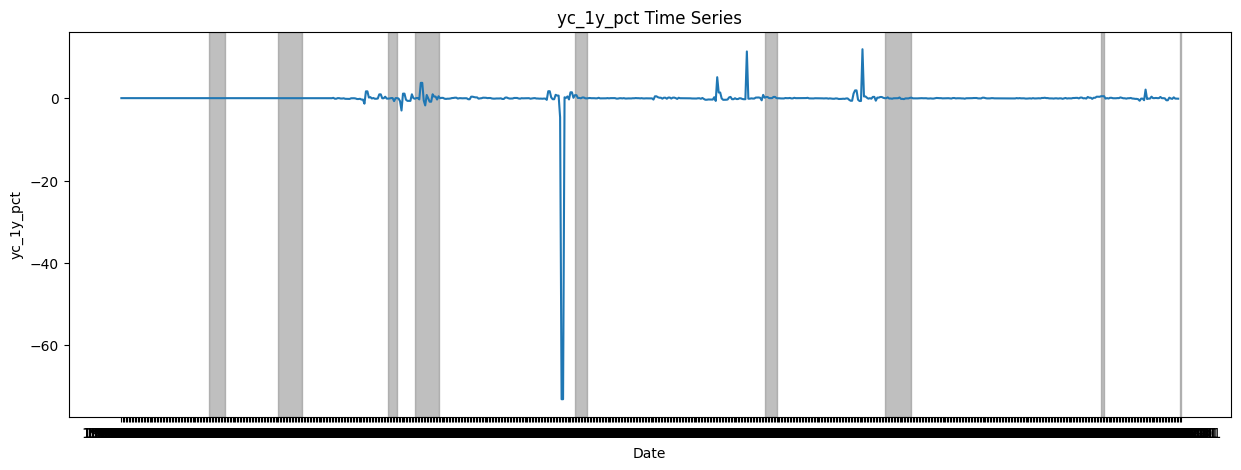

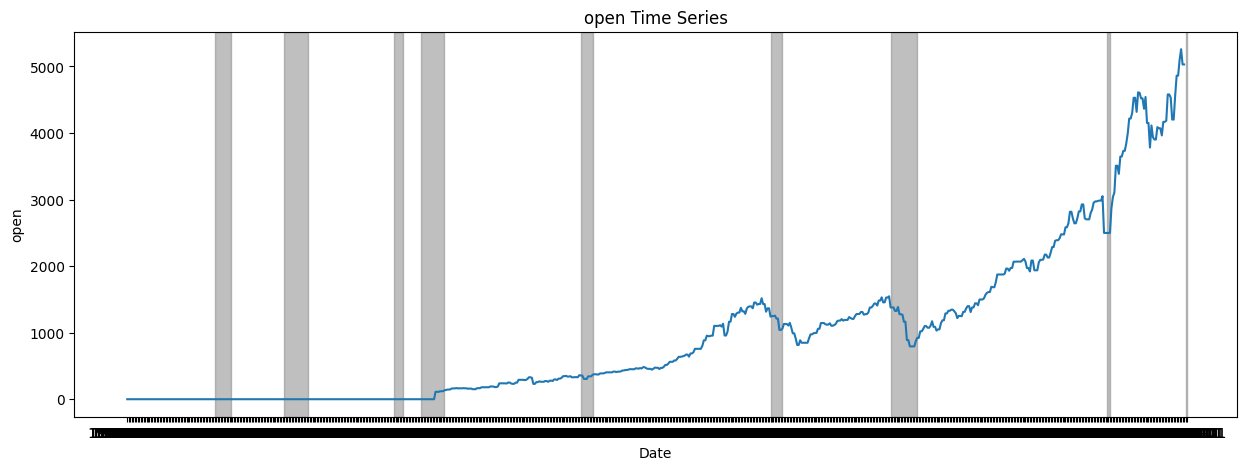

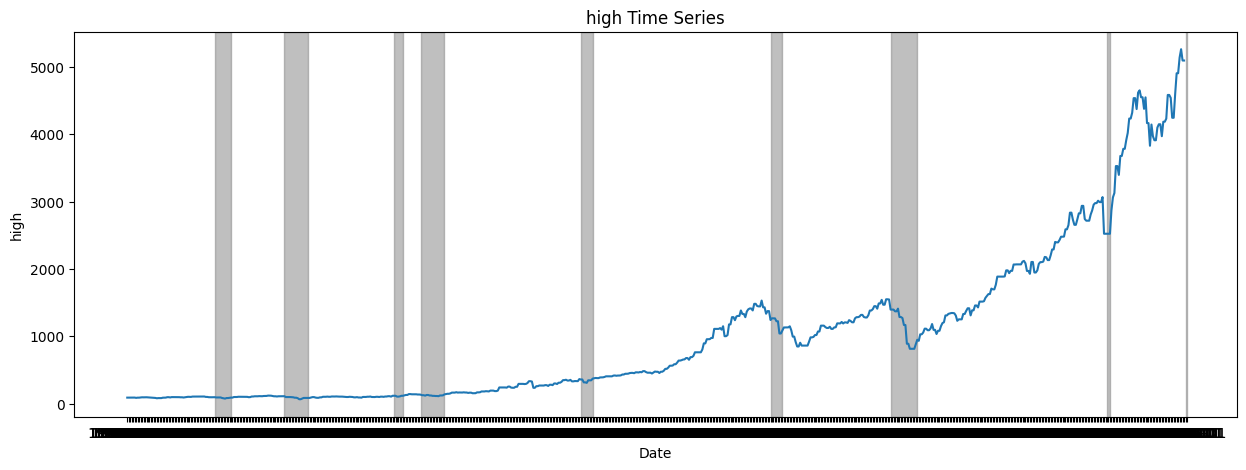

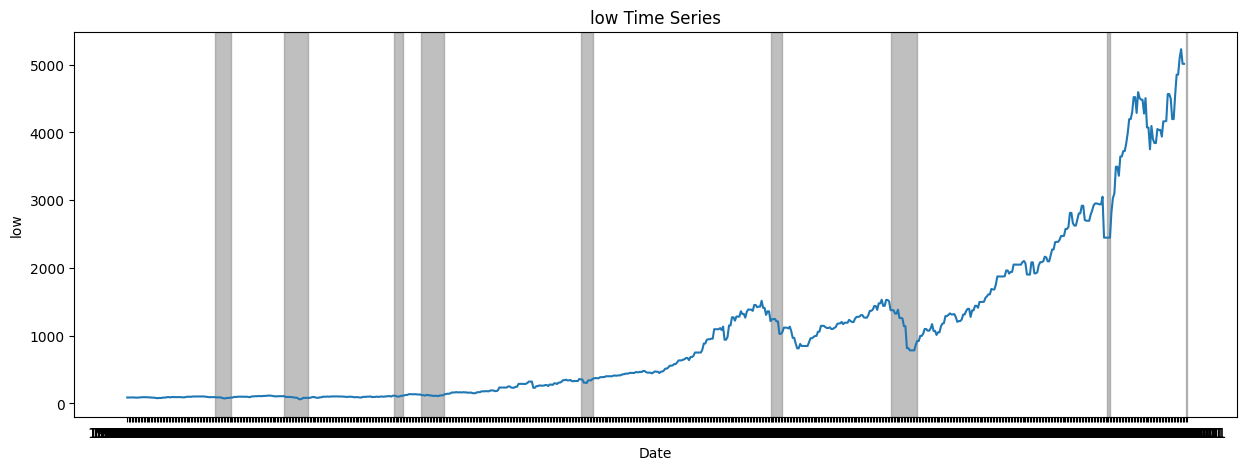

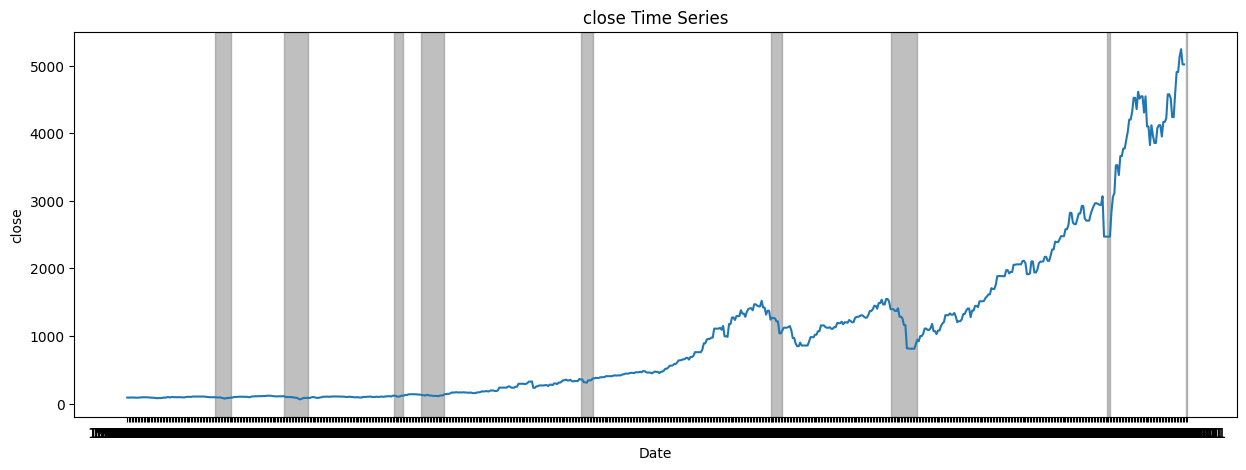

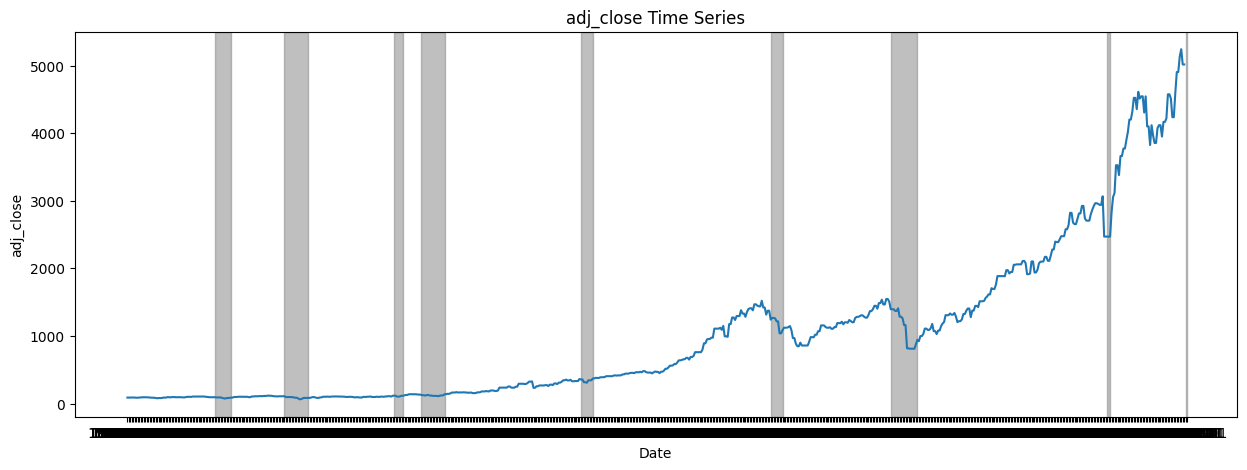

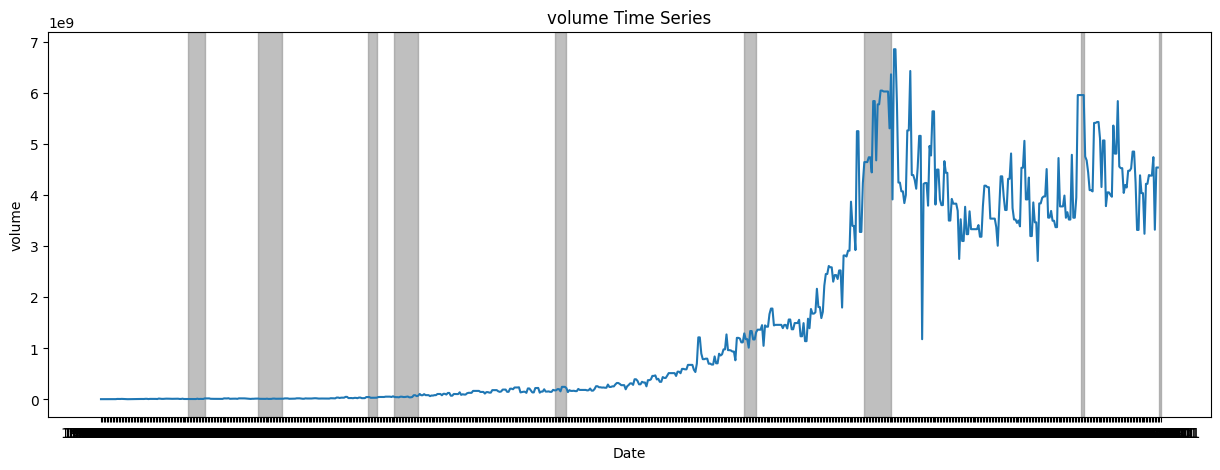

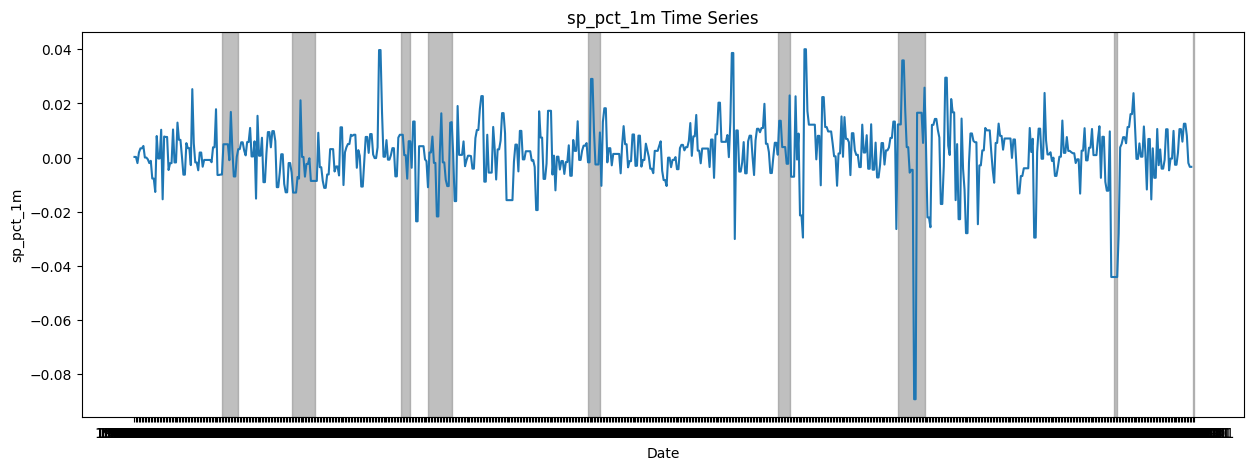

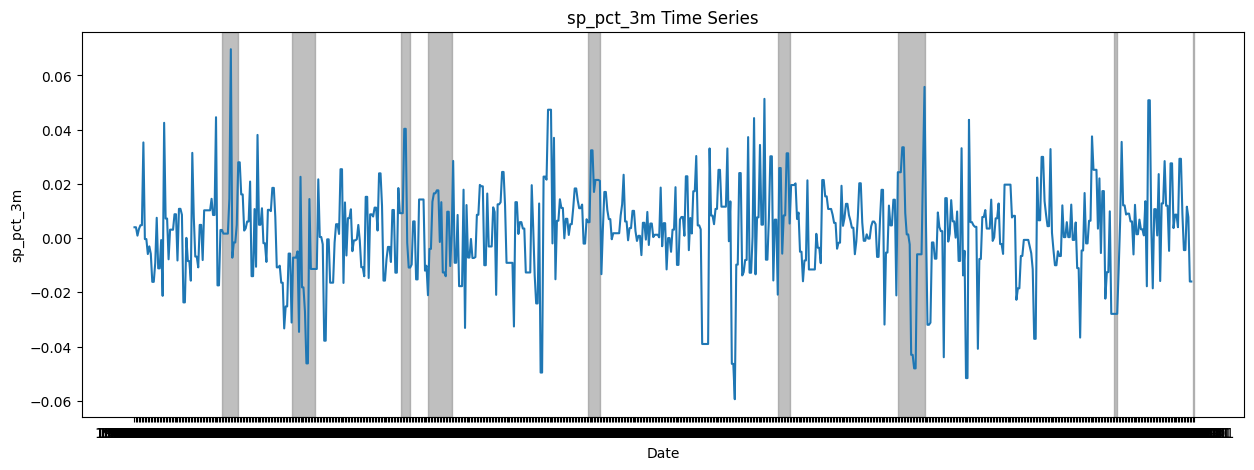

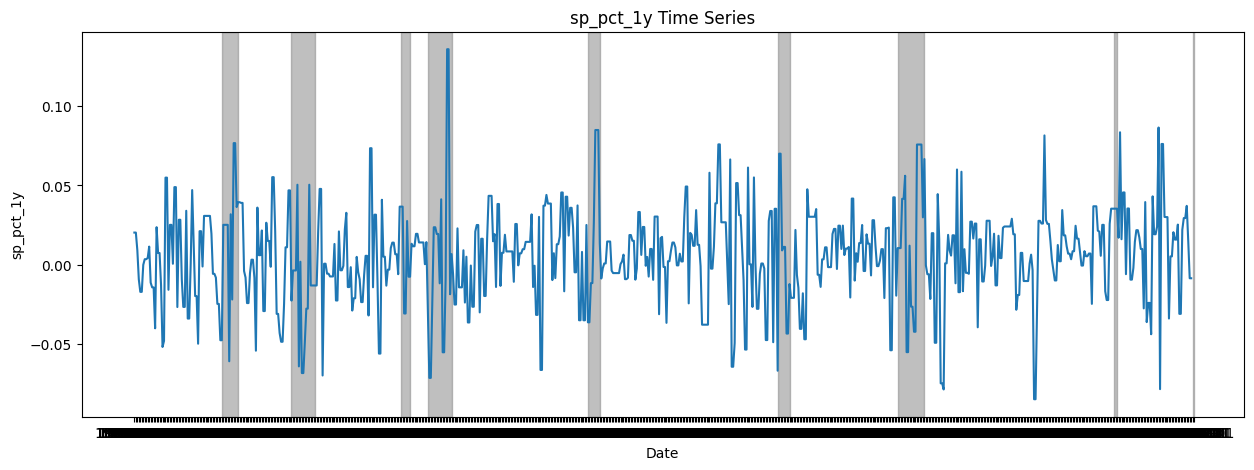

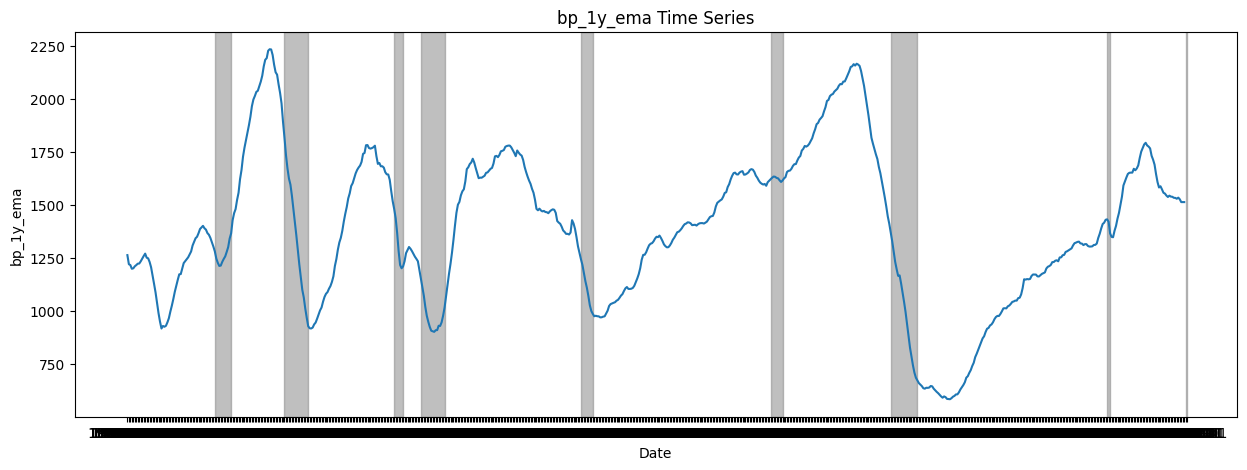

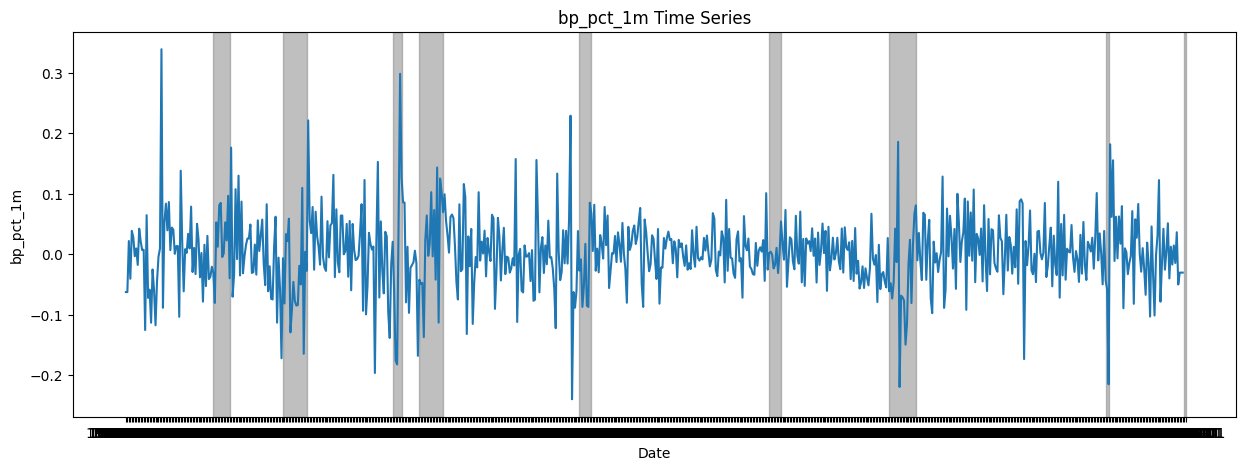

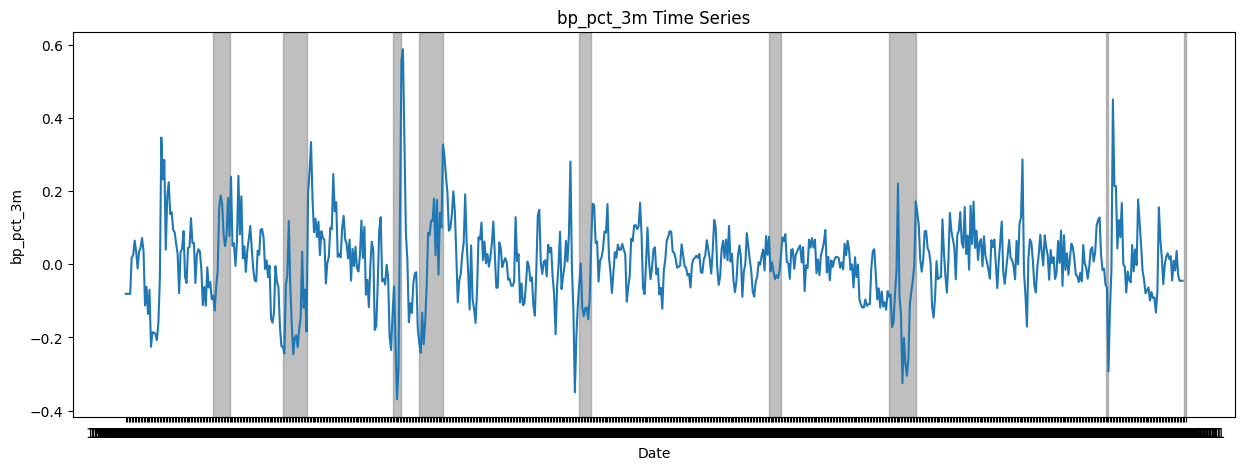

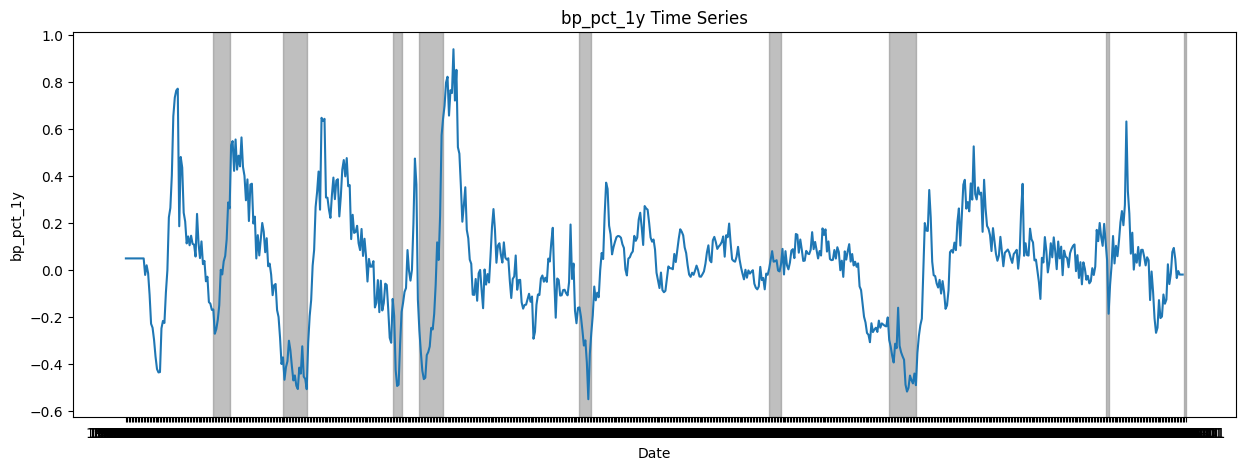

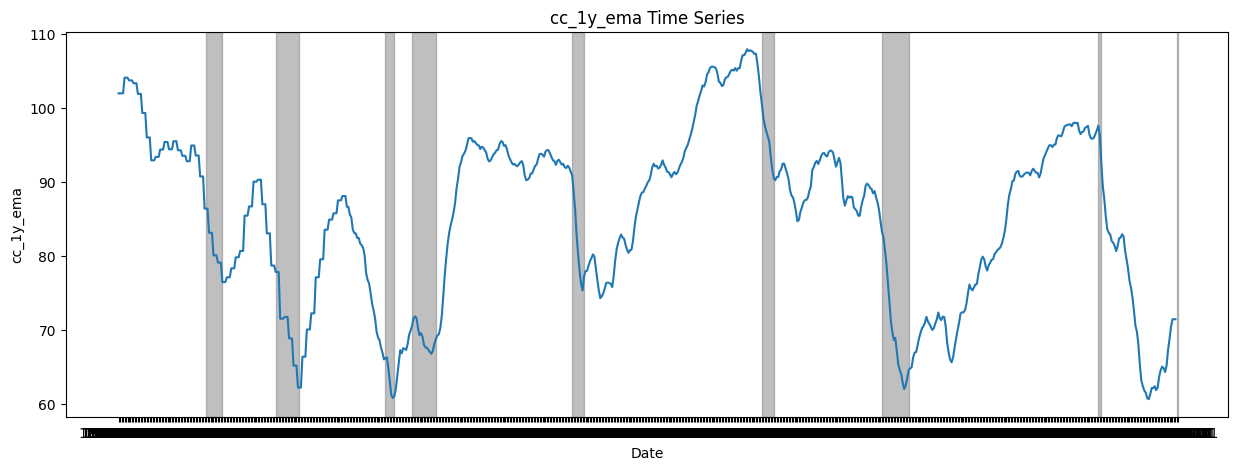

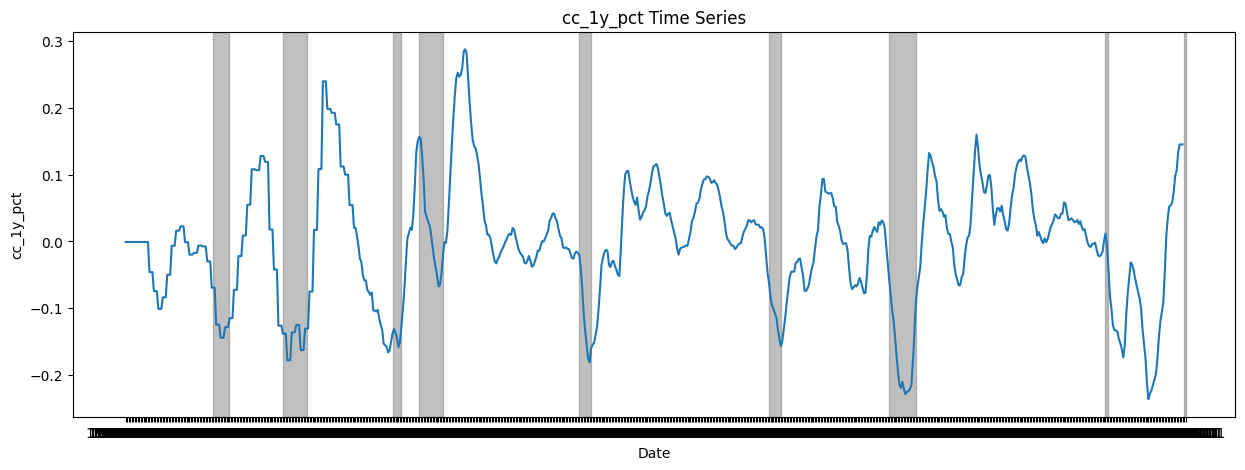

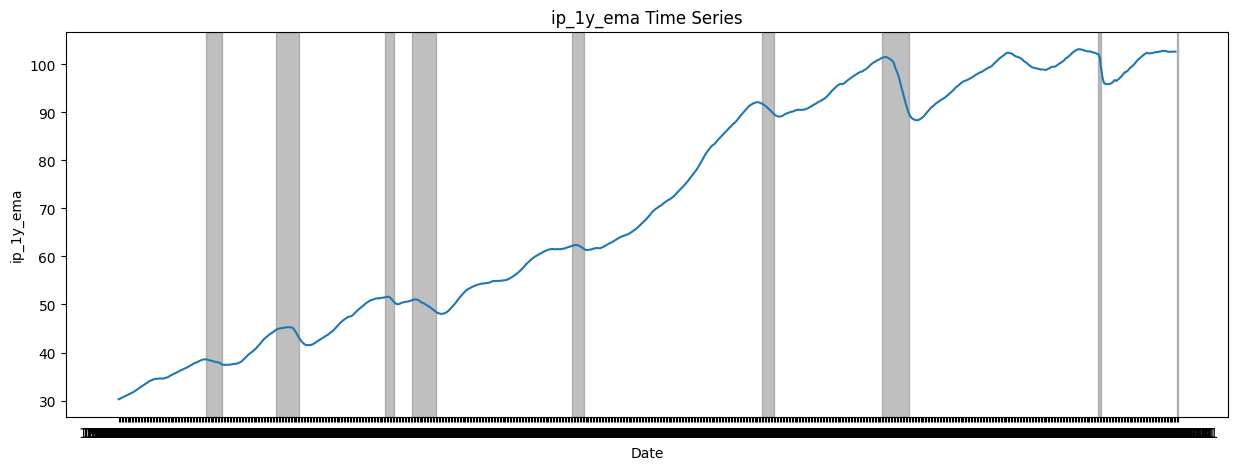

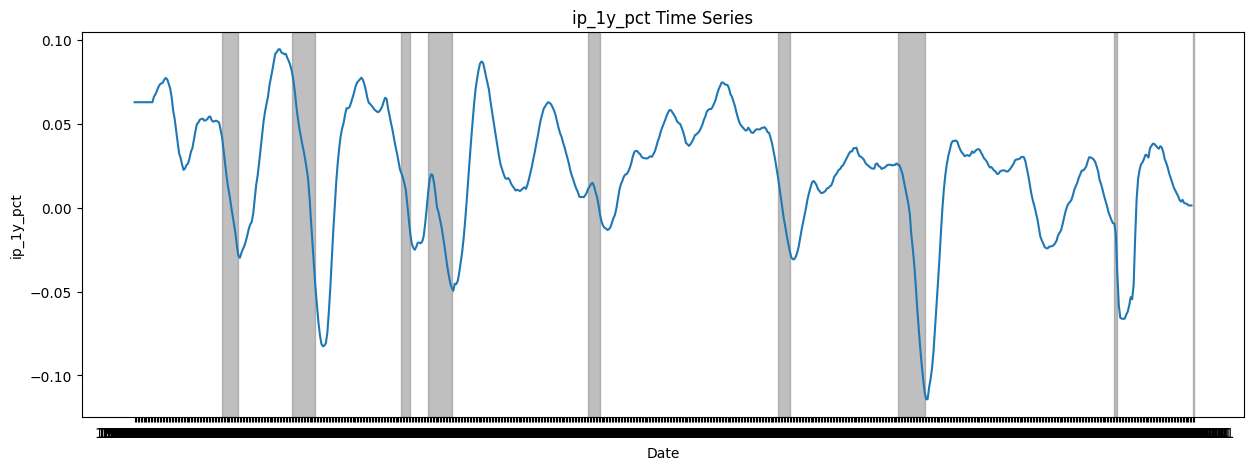

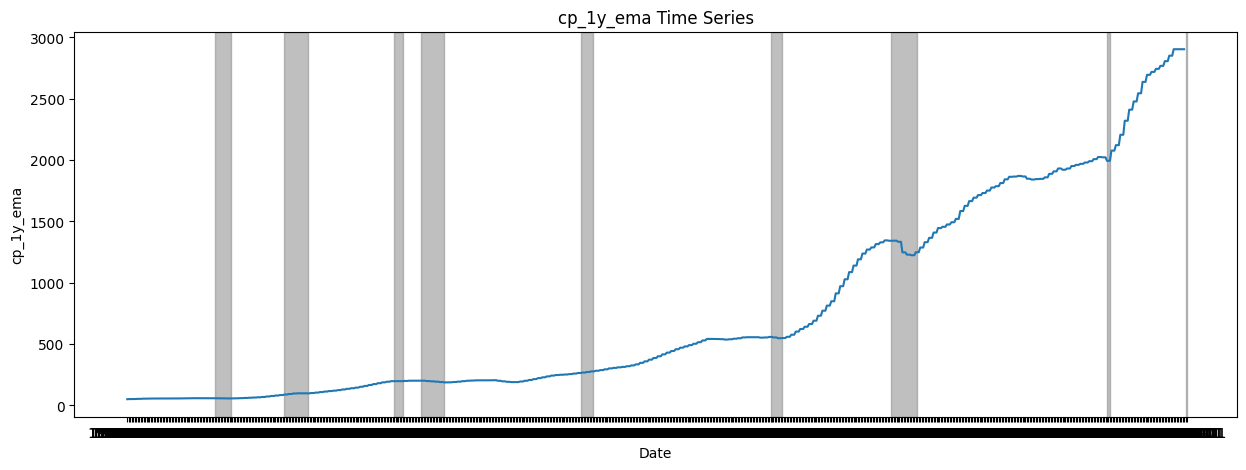

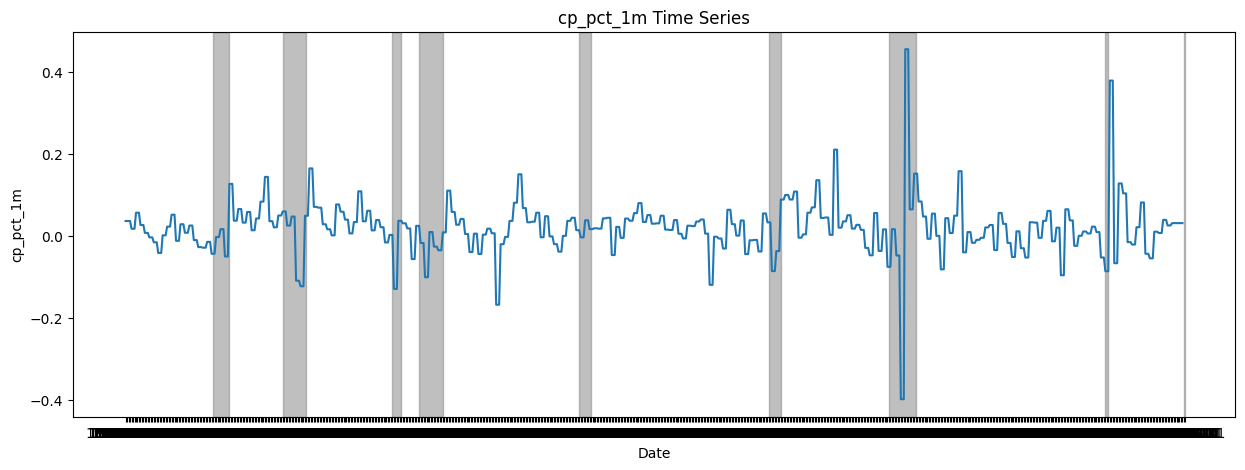

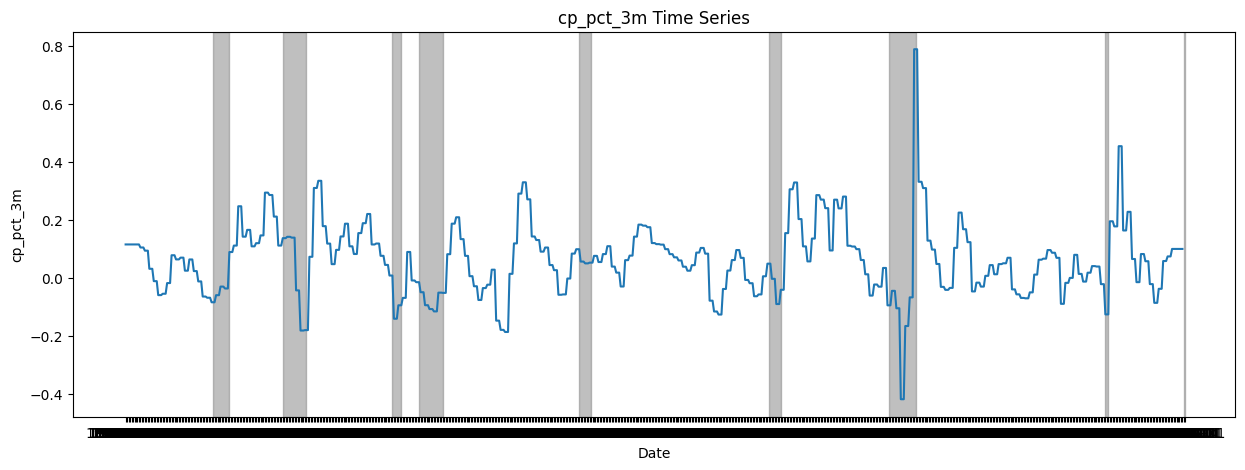

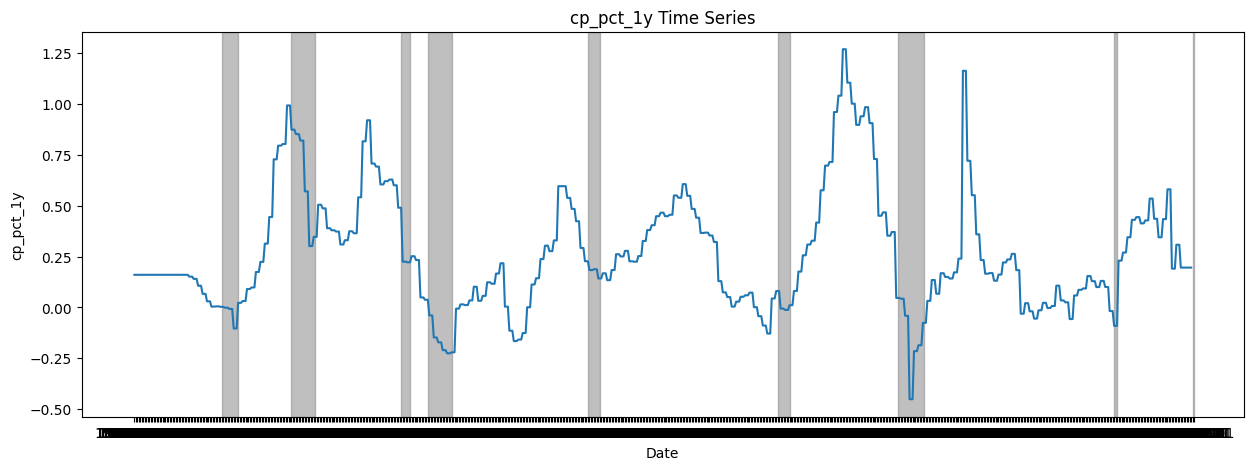

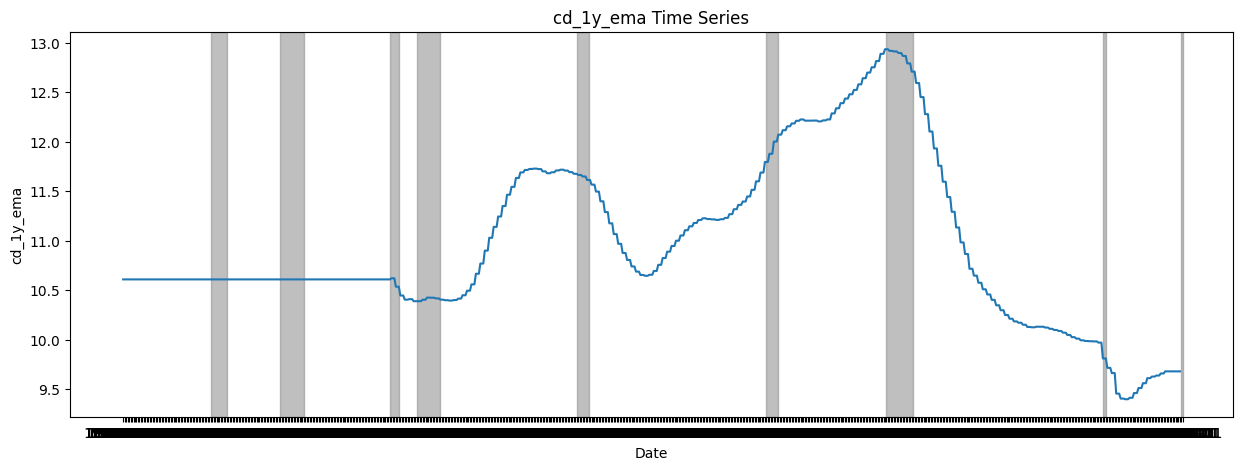

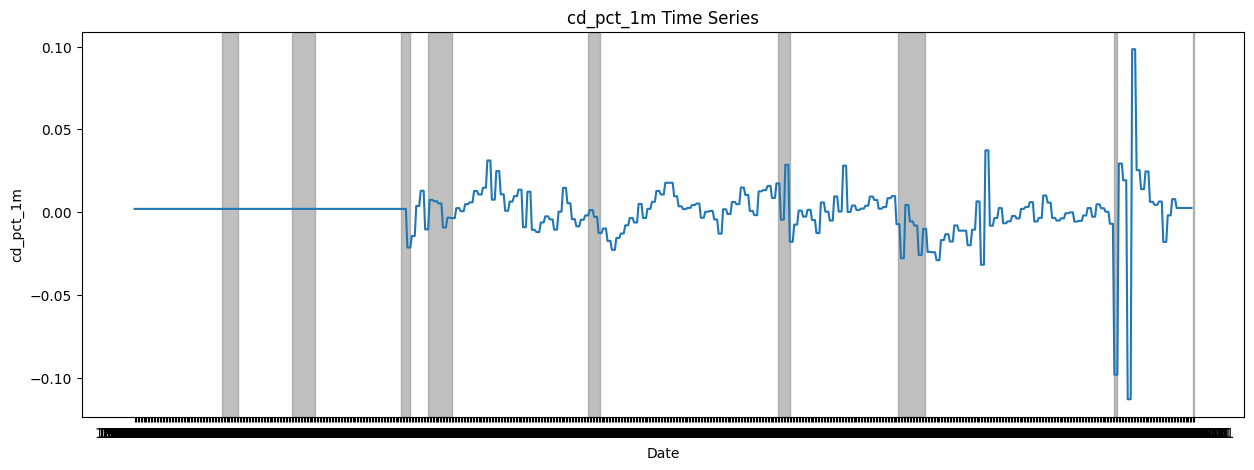

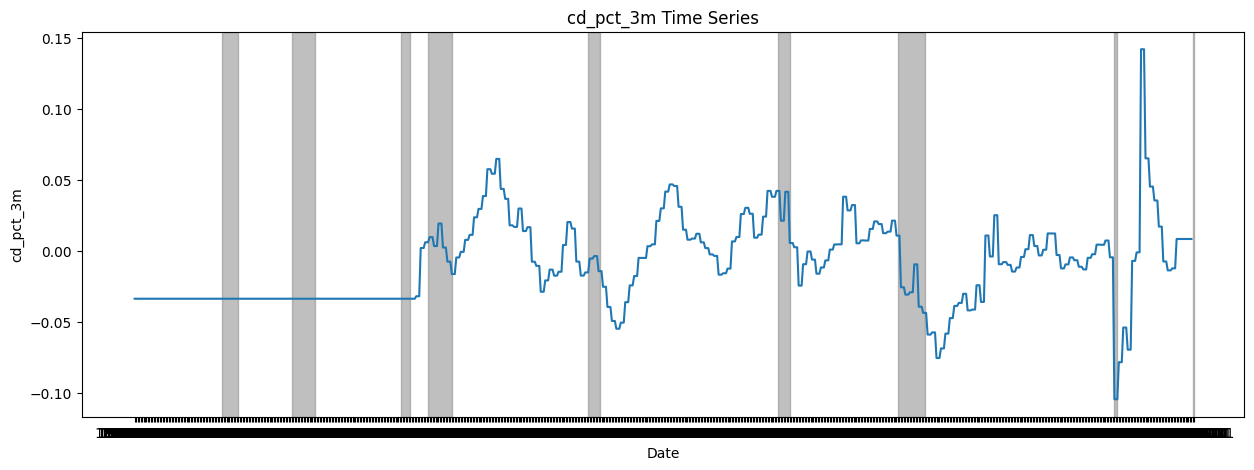

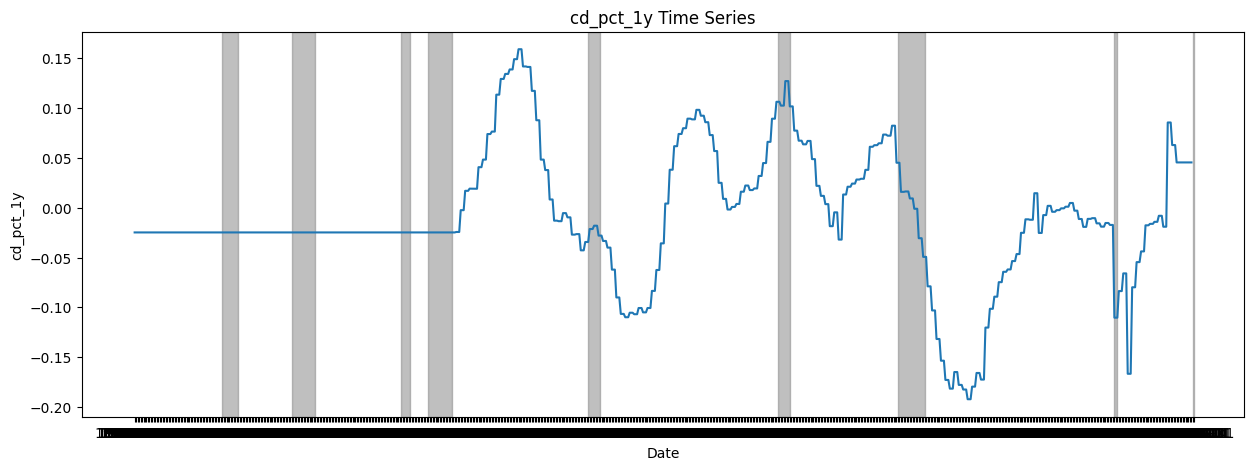

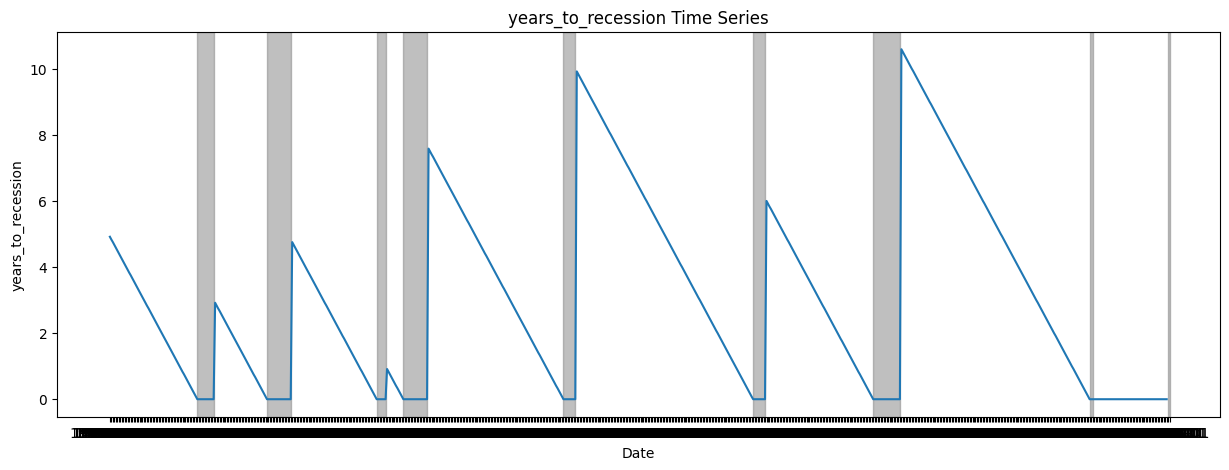

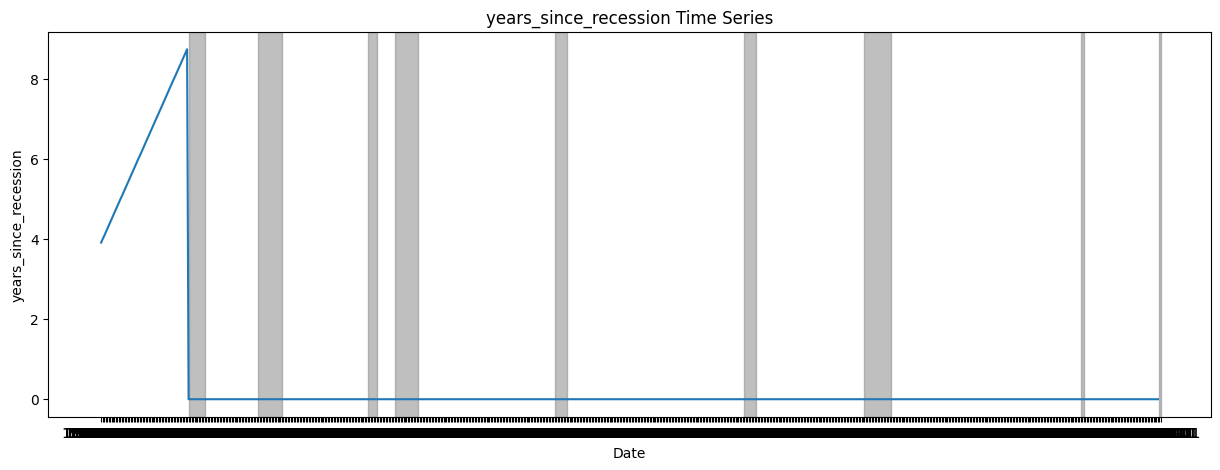

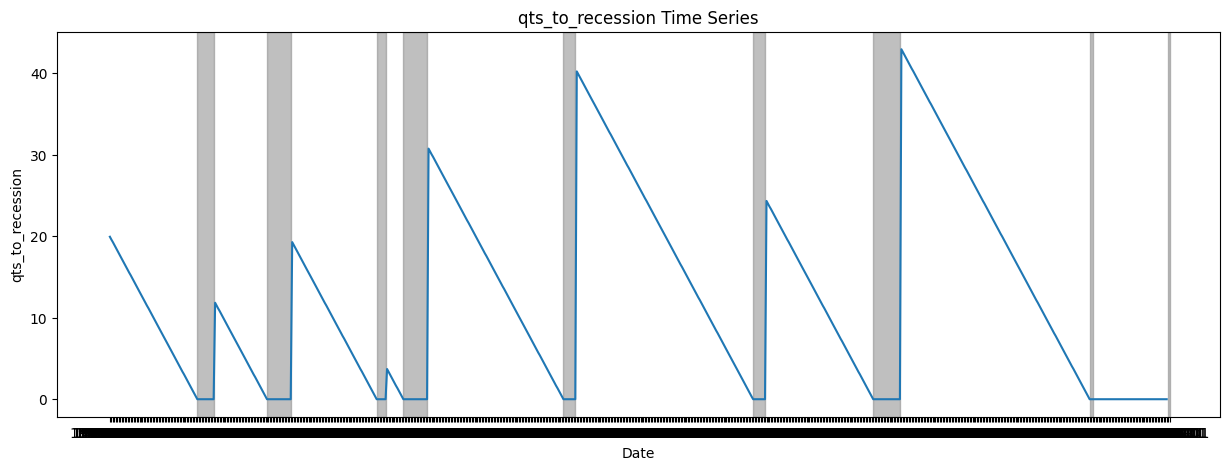

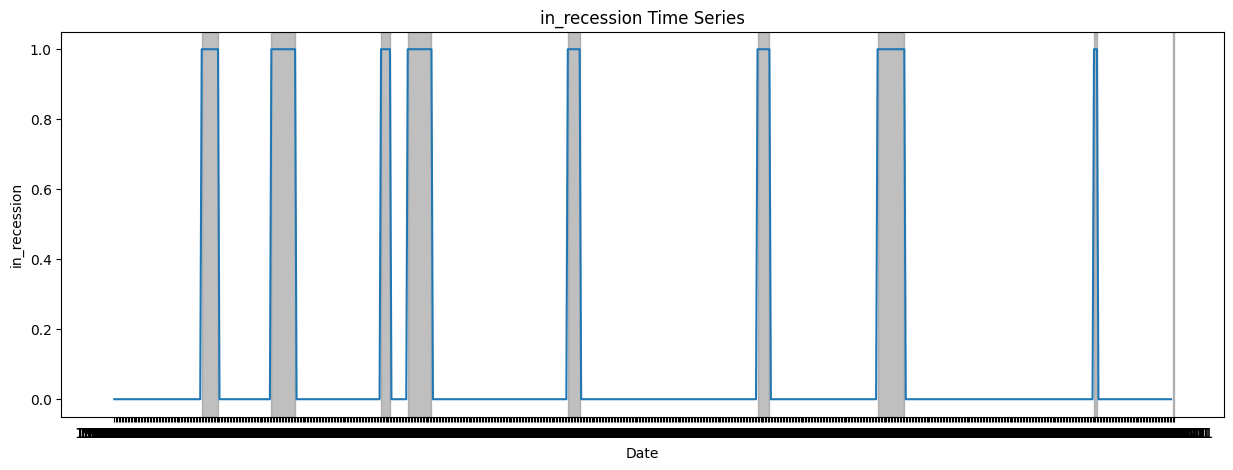

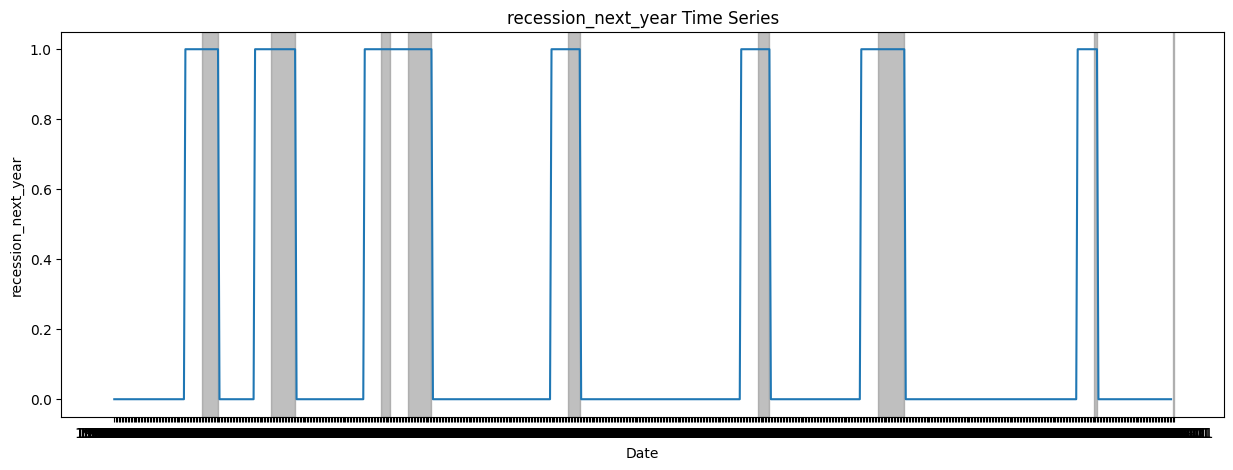

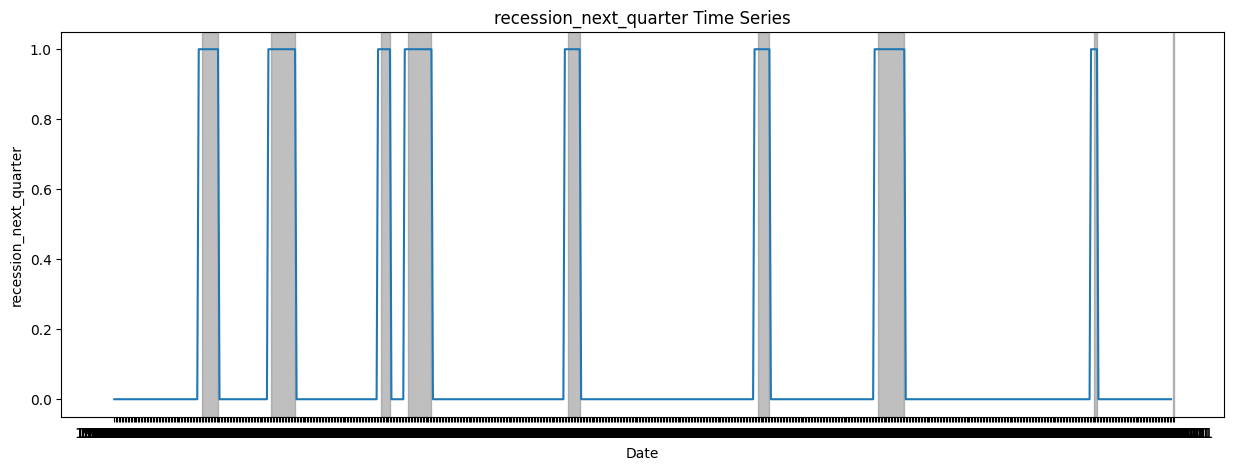

In [14]:
def plot_time_series(column):
    # Time series w.r.t. dates provided (dataset.date)
    plt.figure(figsize=(15, 5))

    # Plotting the time series
    plt.plot(dataset.date, dataset[column])

    # Adding title and labels
    plt.title(f'{column} Time Series')
    plt.xlabel('Date')
    plt.ylabel(column)

    # Highlight ranges when in_recession is 1
    in_recession = dataset[dataset.in_recession == 1]
    
    # highlight recessions in the plot with grey
    for start, end in recessions:
        plt.axvspan(start, end, color='grey', alpha=0.5)

    # Display the plot
    plt.show()

# Plotting the time series of every column
for column in dataset.columns[1:]:
    plot_time_series(column)

